# Lei de Benford aplicada a Dados Eleitorais Brasileiros

## 1. Motivação do Estudo

Diversas pessoas levantaram a possibilidade de que as eleições brasileiras foram adulteradas de maneira a favorecer esse ou aquele candidato. Um dos argumentos utilizados era que os resultados divulgados não seguiam o comportamento esperado de um conjunto de dados quando se aplicava ferramentas de Estatística. <br>
Uma dessas ferramentas mencionadas é a Lei de Benford. Vamos validar os dados eleitorais para verificar se eles obedecem essa lei.

## 2. Definição de Lei de Benford

Segundo a Wikipedia:

*A lei de Benford, também chamada de lei do primeiro dígito, lei de Newcomb-Benford e lei números anômalos refere-se à distribuição de dígitos em várias fontes de casos reais. Ao contrário da homogeneidade esperada, a lei afirma que em muitas coleções de números que ocorrem naturalmente, o primeiro dígito significativo provavelmente será pequeno. Sem homogeneidade, esta distribuição mostra que o dígito 1 tem 30% de chance de aparecer em um conjunto de dados estatísticos enquanto valores maiores tem menos possibilidade de aparecer.</br>
Frank Benford demonstrou que esse resultado se aplica a uma ampla variedade de conjuntos de dados, incluindo contas de eletricidade, endereços, preços de ações, preços de casas, números de população, taxas de mortalidade, comprimentos de rios, constantes físicas e matemáticas. pelas leis de potência (que são muito comuns na natureza). Todas essas afirmações são calculadas ou definidas junto a uma escala logarítmica.*

Traduzindo: se analisarmos somente o primeiro número de cada item em um conjunto de dados, vamos ver mais ocorrências dos números mais baixos. Isso faz sentido se pensarmos um pouco.

Imaginemos o caso onde queremos sortear um número aleatório entre 1 e 99. Para saber qual é a chance de começar com o dígito 1, temos que listar todos aqueles que estão nessa categoria (1,10,11,12,13,14,15,16,17,18 e 19). São 11 ocorrências em um total de 99 possibilidades. Ou seja, a chance é 1/9, assim como para qualquer um dos dígitos. 

Em um caso onde queremos sortear um número entre 1 e 199, a coisa muda bastante de figura. Temos 111 ocorrências para o dígito 1, e apenas 11 para as demais. Ou seja, a chance de começar com **1** é muito maior. Se o limite for 299, temos mais ocorrências para **1** e **2**, e assim por diante. 

Ou seja, para um **grande** conjunto de dados, condição necessária para fazer uma análise estatística, onde o valor medido passa por **diversas ordens de grandeza** (dezenas, centenas, milhares, por exemplo), a chance de que o primeiro dígito do valor seja pequeno é maior do que a chance dele ser grande. 

## 3. Dados disponíveis

Os dados de todas as eleições brasileiras podem ser obtidos da página Repositório de Dados Eleitorais, do TSE. A apuração de cada zona eleitoral está disponível no link "Votação nominal por município e zona (formato ZIP)". Para presidente, usei como entrada apenas o arquivo terminado em 'BR'.<br>
Nesse arquivo, cada linha tem o número de votos AA que o candidato BB recebeu na zona eleitoral CC, na cidade DD e estado EE.
Segundo o TSE: "Estão incompletos os dados de candidatos e de resultados das eleições de 1994 a 2002. Está sendo realizada uma revisão nas fontes de dados e, conforme os trabalhos forem concluídos, os arquivos serão substituídos."

## 4. Funcionamento do código

É necessário informar o ano (os dados de entrada tem colunas diferentes em 2018) e o turno da eleição.<br>
Para o arquivo do ano desejado, que se encontra na pasta 'dados/', ele varre cada linha buscando o número de votos AA que o candidato BB recebeu na zona eleitoral CC, na cidade DD e estado EE.<br>
Depois cria para cada candidato um contador que mede o número de vezes que cada dígito aparece em cada uma das zonas. Um contador nacional, um contador para cada estado e um para cada região do Brasil. Para facilitar a comparação, isso é normalizado para cada contador, de modo que tenhamos o percentual de vezes que cada dígito apareceu e não o número total.<br>
Calcula a distribuição esperada da lei de Benford.<br>
É criado um gráfico com uma linha azul (lei de Benford) e pontos vermelhos (dados reais). O título é "'Candidato N: XX" para os gráficos com os dados nacionais, "Candidato N: XX no estado: YY" com os dados estaduais, e "Candidato N: XX na regiao: YY" com os dados regionais.<br> 
Dentro do gráfico, temos um valor de sigma, que é a distância média dos pontos para a linha azul. Se sigma = 2%, isso quer dizer que os pontos vermelhos estão, em média, 2% a mais ou a menos do que o esperado. Por exemplo, o digito '5' deve aparecer com 8% de probabilidade. Com sigma = 2%, o ponto vermelho deve estar entre 6% e 10%.<br>
No total, são criados 442 gráficos: 1 Nacional, 5 Regionais, 26 estaduais, 1 Distrito Federal e 1 Exterior, para cada candidato.
Temos também um gráfico com os valores de sigma para cada candidato em cada estado e outro com os valores para o Brasil e para as regiões. Se sigma é menor do que 3, o ponto é azul. Se entre 3 e 6, é verde. Se entre 6 e 9, o ponto é amarelo. Se maior do que 9, o ponto é vermelho. Assim podemos ver o quanto cada dupla (candidato,estado) se aproximou do modelo matemático. Os estados estão em ordem pelo número de zonas eleitorais em 2018.<br>
Os gráficos são salvos na pasta 'imagens/'.

## 5. Preparação e carregamento dos dados

Vamos escolher um ano e um turno.

In [69]:
#ANO DA ELEICAO 2006, 2010, 2014 ou 2018
ano =2018
#TURNO DA ELEICAO 1 ou 2
turno = 1

Os dados de 2018 possuem uma formatação diferente.

In [70]:
import os #para acessar a lista de arquivos na pasta
import csv #para processar os arquivos CSV

#formatacao diferente para os dados de 2018
if ano ==2018:
    #dado de entrada tem cabecalho?
    nao_cabecalho = False
    #posicao das colunas no dado de entrada - primeira coluna 0
    col_estado = 10
    col_cidade = 14
    col_zona = 15
    col_candidato = 19
    col_votos = 37
    col_turno = 5
else:
    #dado de entrada tem cabecalho?
    nao_cabecalho = True
    #posicao das colunas no dado de entrada - primeira coluna 0
    col_estado = 5
    col_cidade = 8
    col_zona = 9
    col_candidato = 11
    col_votos = 28
    col_turno = 3

Criando lista de estados e regiões.

In [71]:
#pasta onde estao os dados
path = 'dados/'
#lista com Sigla do Estado - Nome da cidade
cidades=set([])
#lista com Numero dos Candidatos
candidatos=set([])
#lista com estados
if ano ==2010:
    estados=['RR','AC','AP','DF','SE','RO','VT','TO','AL','MS','ES','MT','AM','RN','PB','PI','GO','SC','PA','MA','CE','PE','RJ','RS','ZZ','PR','BA','MG','SP']
else:
    estados=['RR','AC','AP','DF','SE','RO','TO','AL','MS','ES','MT','AM','RN','PB','PI','GO','SC','PA','MA','CE','PE','RJ','RS','ZZ','PR','BA','MG','SP']

#lista com regiao
regioes={
    'sul': ['RS','SC','PR'],
    'sudeste': ['SP','RJ','ES','MG'],
    'centro-oeste': ['MS','MT','GO','DF'],
    'norte': ['AC','AP','AM','PA','RO','RR','TO'],
    'nordeste': ['AL','BA','CE','MA','PB','PE','PI','RN','SE']
}


Vamos carregar o arquivo correspondente ao ano escolhido e processar as informações.

In [72]:
#para cada arquivo/cidade na pasta
for filename in os.listdir(path):
    if filename[-11:-7]==str(ano):
        print("Carregando dados de: %d" %ano)
        with open(path+filename) as csv_file:
#para cada cidade, adiciona na lista de cidade        
            csv_reader = csv.reader(csv_file, delimiter=';')
            print("Começando leitura do arquivo: "+filename)
#cria um dicionario com os dados da cidade
#estado, numero dos candidatos e numero de votos
            line_count = 0        
            for row in csv_reader:
                if (line_count>0 or nao_cabecalho) and (int(row[col_turno]) == turno):
                    cidade_nome = str(row[col_estado])+" - " + str(row[col_cidade])+" z-"+str(row[col_zona])
                    print(cidade_nome)
                    cidades.add(cidade_nome)
                    try:
                        vars()[str(row[col_estado])+ str(row[col_cidade])+str(row[col_zona])]
                    except KeyError:
                        vars()[str(row[col_estado])+ str(row[col_cidade])+str(row[col_zona])] = None
                    if vars()[str(row[col_estado])+ str(row[col_cidade])+str(row[col_zona])] is None:
                        vars()[str(row[col_estado])+ str(row[col_cidade])+str(row[col_zona])] = {}
                    
                    numero_votos_cidade = int(row[col_votos])
                    vars()[str(row[col_estado])+ str(row[col_cidade])+str(row[col_zona])][str(row[col_candidato])] =numero_votos_cidade
                    line_count += 1
                    candidatos.add(str(row[col_candidato]))
                else:
                    line_count+=1
                
            print(f'Processed {line_count} lines.')
            
        

#ao terminar todos os arquivos
print("Numeros de cidades processadas: %d" %len(cidades))


Carregando dados de: 2018
Começando leitura do arquivo: votacao_candidato_munzona_2018_BR.csv
MG - CAPIM BRANCO z-174
BA - SERROLÂNDIA z-46
MA - GRAÇA ARANHA z-108
RS - ARARICÁ z-131
SC - SÃO JOSÉ DO CERRITO z-104
BA - CAETANOS z-58
BA - INHAMBUPE z-44
CE - SENADOR SÁ z-45
MG - PASSABÉM z-132
SP - LUCIANÓPOLIS z-159
SP - BEBEDOURO z-24
PB - INGÁ z-8
RS - BARRA DO RIO AZUL z-20
MG - JEQUITINHONHA z-149
PR - CÂNDIDO DE ABREU z-106
SP - GUARULHOS z-395
RJ - TERESÓPOLIS z-195
MG - BIQUINHAS z-1
PE - SALOÁ z-136
SP - SÃO PAULO z-2
PE - TAQUARITINGA DO NORTE z-51
ES - MONTANHA z-38
RJ - CACHOEIRAS DE MACACU z-49
ZZ - CAIENA z-1
MG - SÃO SEBASTIÃO DO PARAÍSO z-260
BA - GUANAMBI z-64
AL - PENEDO z-13
PE - RECIFE z-5
DF - BRASÍLIA z-2
SC - BALNEÁRIO ARROIO DO SILVA z-1
SP - ÓLEO z-94
BA - MATINA z-113
CE - FORTALEZA z-115
SE - ITABAIANINHA z-30
AM - LÁBREA z-12
BA - BUERAREMA z-166
MT - NOVO SÃO JOAQUIM z-26
SC - ENTRE RIOS z-48
SC - PEDRAS GRANDES z-33
BA - MACAJUBA z-87
PR - MOREIRA SALES z-9

Vamos processar os dados para reunir a informação por candidato.

In [73]:
#criando biblioteca para cada candidato
for candidato in candidatos:
    vars()["cand_"+str(candidato)]={}
    for numero in range(0,10):
        vars()["cand_"+str(candidato)][numero]=0
            
#criando biblioteca para cada candidato para cada estado
for candidato in candidatos:
    for estado in estados:
        vars()["cand_"+str(candidato)+"_"+str(estado)]={}
        for numero in range(0,10):
            vars()["cand_"+str(candidato)+"_"+str(estado)][numero]=0

#criando biblioteca para cada candidato para cada regiao
for candidato in candidatos:
    for regiao in regioes:
        vars()["cand_"+str(candidato)+"_"+str(regiao)]={}
        for numero in range(0,10):
            vars()["cand_"+str(candidato)+"_"+str(regiao)][numero]=0

#para cada zona, pegar o primeiro numero do numero de votos de cada candidato
for cidade in cidades:
    temp = cidade.replace(" - ", "")
    nome_cidade = temp.replace(" z-", "")
    for candidato in vars()[nome_cidade].keys():
        vars()["cand_"+str(candidato)][int(str(vars()[nome_cidade][candidato])[0])]+=1

#para cada estado, pegar o primeiro numero do numero de votos de cada candidato
for cidade in cidades:
    temp = cidade.replace(" - ", "")
    nome_cidade = temp.replace(" z-", "")
    for candidato in vars()[nome_cidade].keys():
        vars()["cand_"+str(candidato)+"_"+str(nome_cidade[0:2])][int(str(vars()[nome_cidade][candidato])[0])]+=1

#para cada regiao, pegar o primeiro numero do numero de votos de cada candidato
for regiao in regioes.keys():
    for candidato in candidatos:
        for estado in regioes[regiao]:
            for numero in range(0,10):
                vars()["cand_"+str(candidato)+"_"+str(regiao)][numero]+=vars()["cand_"+str(candidato)+"_"+str(estado)][numero]

            

Vamos preparar os gráficos que mostram a distribuição do primeiro dígito de cada candidato para o cenário nacional, por região e por estado.

In [74]:
#preparar plot
for candidato in candidatos:
    vars()["X_"+str(candidato)]=[]
    vars()["Y_"+str(candidato)]=[]
    total=0
    for numero in vars()["cand_"+str(candidato)].keys():
        if numero!=0:
            vars()["X_"+str(candidato)].append(int(numero))
            vars()["Y_"+str(candidato)].append(int(vars()["cand_"+str(candidato)][numero]))
            total+=int(vars()["cand_"+str(candidato)][numero])
    for i in range(0,9):
        if total!=0:
            vars()["Y_"+str(candidato)][i]/=float(total)

#preparar plot estados
for candidato in candidatos:
    for estado in estados:
        vars()["X_"+str(candidato)+str(estado)]=[]
        vars()["Y_"+str(candidato)+str(estado)]=[]
        total=0
        for numero in vars()["cand_"+str(candidato)+"_"+str(estado)].keys():
            if numero!=0:
                vars()["X_"+str(candidato)+str(estado)].append(int(numero))
                vars()["Y_"+str(candidato)+str(estado)].append(int(vars()["cand_"+str(candidato)+"_"+str(estado)][numero]))
                total+=int(vars()["cand_"+str(candidato)+"_"+str(estado)][numero])
        for i in range(0,9):
            if total!=0:
                vars()["Y_"+str(candidato)+str(estado)][i]/=float(total)

#preparar plot regioes
for candidato in candidatos:
    for regiao in regioes:
        vars()["X_"+str(candidato)+str(regiao)]=[]
        vars()["Y_"+str(candidato)+str(regiao)]=[]
        total=0
        for numero in vars()["cand_"+str(candidato)+"_"+str(regiao)].keys():
            if numero!=0:
                vars()["X_"+str(candidato)+str(regiao)].append(int(numero))
                vars()["Y_"+str(candidato)+str(regiao)].append(int(vars()["cand_"+str(candidato)+"_"+str(regiao)][numero]))
                total+=int(vars()["cand_"+str(candidato)+"_"+str(regiao)][numero])
        for i in range(0,9):
            if total!=0:
                vars()["Y_"+str(candidato)+str(regiao)][i]/=float(total)

Vamos calcular o que seriam os valores esperados pela Lei de Benford e comparar com o que temos a partir dos nossos dados.

In [75]:
from math import log10,sqrt 

#lei de benford
Ybenf=[]
for i in range(0,9):
    Ybenf.append(log10(1.+(1.0/float(i+1))))

#erro em relacao a lei de benford em todas as zonas
for candidato in candidatos:
    teste=0
    for i in range(0,9):
        teste+=(Ybenf[i]-vars()["Y_"+str(candidato)][i])**2
    vars()["sigma_"+str(candidato)]=sqrt(teste/float(9))

#erro em relacao a lei de benford por estado
for candidato in candidatos:
    for estado in estados:
        teste=0
        for i in range(0,9):
            teste+=(Ybenf[i]-vars()["Y_"+str(candidato)+str(estado)][i])**2
        vars()["sigma_"+str(candidato)+str(estado)]=sqrt(teste/float(9))
    
#erro em relacao a lei de benford por regiao
for candidato in candidatos:
    for regiao in regioes:
        teste=0
        for i in range(0,9):
            teste+=(Ybenf[i]-vars()["Y_"+str(candidato)+str(regiao)][i])**2
        vars()["sigma_"+str(candidato)+str(regiao)]=sqrt(teste/float(9))

Vamos gerar todos os gráficos e exportar para uma pasta chamada 'imagens'.

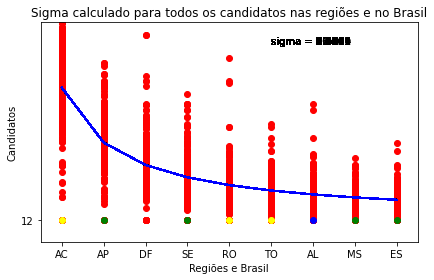

In [68]:
#plotar graficos
import matplotlib.pyplot as plt

#grafico nacional por candidato
for candidato in candidatos:
    plt.scatter(vars()["X_"+str(candidato)], vars()["Y_"+str(candidato)], color = 'red')
    plt.plot(vars()["X_"+str(candidato)], Ybenf, color = 'blue')
    plt.title('Candidato N: %s' % candidato)
    plt.text(6,0.4,"sigma = %2.1f" % (100*vars()["sigma_"+str(candidato)]))
    plt.xlabel('Digito')
    plt.ylabel('Percentual de cada digito')
    plt.axis((0.5,9.5,-0.05,0.45))
    plt.savefig("imagens/graf_"+str(candidato)+".png")
#    plt.show()

#graficos por estado por candidato
for candidato in candidatos:
    for estado in estados:
        plt.scatter(vars()["X_"+str(candidato)+str(estado)], vars()["Y_"+str(candidato)+str(estado)], color = 'red')
        plt.plot(vars()["X_"+str(candidato)+str(estado)], Ybenf, color = 'blue')
        plt.title('Candidato N: %s no estado: %s' % (candidato, estado))
        plt.text(6,0.4,"sigma = %.3f" % (100*vars()["sigma_"+str(candidato)+str(estado)]))
        plt.xlabel('Digito')
        plt.ylabel('Percentual de cada digito')
        plt.axis((0.5,9.5,-0.05,0.45))
        plt.savefig("imagens/graf_"+str(candidato)+"_"+str(estado)+".png")
#        plt.show()

#grafico por regiao por candidato
for candidato in candidatos:
    for regiao in regioes:
        plt.scatter(vars()["X_"+str(candidato)+str(regiao)], vars()["Y_"+str(candidato)+str(regiao)], color = 'red')
        plt.plot(vars()["X_"+str(candidato)+str(regiao)], Ybenf, color = 'blue')
        plt.title('Candidato N: %s na regiao: %s' % (candidato, regiao))
        plt.text(6,0.4,"sigma = %.3f" % (100*vars()["sigma_"+str(candidato)+str(regiao)]))
        plt.xlabel('Digito')
        plt.ylabel('Percentual de cada digito')
        plt.axis((0.5,9.5,-0.05,0.45))
        plt.savefig("imagens/graf_"+str(candidato)+"_"+str(regiao)+".png")
#        plt.show()


#grafico de candidato x estado
for candidato in sorted(candidatos):
    for estado in estados:
        if 100*vars()["sigma_"+str(candidato)+str(estado)]<3:
            cor = "blue"
        elif 100*vars()["sigma_"+str(candidato)+str(estado)]<6:
            cor = "green"
        elif 100*vars()["sigma_"+str(candidato)+str(estado)]<9:
            cor = "yellow"
        else:
            cor = "red"

        plt.scatter(estado,candidato,color=cor)
plt.tight_layout()
plt.title('Sigma calculado para todos os candidatos nos estados')
plt.xlabel('Estados')
plt.ylabel('Candidatos')
plt.savefig("imagens/sig_crossplot.png")
#plt.show()

#grafico de candidato x regiao e Brasil
for candidato in sorted(candidatos):
    for regiao in regioes:
        if 100*vars()["sigma_"+str(candidato)+str(regiao)]<3:
            cor = "blue"
        elif 100*vars()["sigma_"+str(candidato)+str(regiao)]<6:
            cor = "green"
        elif 100*vars()["sigma_"+str(candidato)+str(regiao)]<9:
            cor = "yellow"
        else:
            cor = "red"
        plt.scatter(regiao,candidato,color=cor)
    if 100*vars()["sigma_"+str(candidato)]<3:
        cor = "blue"
    elif 100*vars()["sigma_"+str(candidato)]<6:
        cor = "green"
    elif 100*vars()["sigma_"+str(candidato)]<9:
        cor = "yellow"
    else:
        cor = "red"
    plt.scatter('BR',candidato,color=cor)
    
plt.tight_layout()
plt.title('Sigma calculado para todos os candidatos nas regiões e no Brasil')
plt.xlabel('Regiões e Brasil')
plt.ylabel('Candidatos')
plt.savefig("imagens/sig_crossplot_regioes.png")
#plt.show()


## 6. Conclusões

Podemos olhar o resultado de cada candidato em cada estado, região ou no Brasil inteiro, mas vamos nos concentrar no gráfico que resume tudo isso. Geramos um gráfico que coloca os estados no eixo horizontal e os candidatos no eixo vertical. Para cada par (estado, candidato), colorimos o ponto em função de quão próximo a distribuição real está daquela prevista pela Lei de Benford. A escala de qualidade é, de melhor para pior: Azul, Verde, Amarelo e Vermelho. 

<img src="imagens/sig_crossplot.png"></img>

Podemos ver grande parte do gráfico está pintada de azul e verde. Vamos olhar com calma os casos com resultados piores.

### 6.1 Estados com Pontos Vermelhos

Roraima, Acre, Tocantins, Amazonas, Piauí e Distrito Federal possuem resultados bem distantes do previsto pela Lei de Benford. São estados com uma população pequena, o que nos indica que talvez não seja adequado aplicar essas ferramentas estatísticas. <br>
Temos um outro caso especial, que é o Rio de Janeiro. Nesse estado, uma das possíveis explicações para esse desvio é a predileção pelo candidato local, do partido 17, que possui a maior diferença para o previsto. 

### 6.2 Candidatos com grandes variações

Temos dois candidatos que tem uma diferença considerável em grande parte dos estados. O partido 27, Democracia Cristã, e o partido 54, Pátria Livre, são novos e com uma representatividade baixa, o que pode nos indicar de novo que a estatística pode ser pobre nesses casos.

Agora vamos fazer a mesma avaliação, mas olhando as regiões e o total para o país. Para cada par (região, candidato), colorimos o ponto em função de quão próximo a distribuição real está daquela prevista pela Lei de Benford. A escala de qualidade é, de melhor para pior: Azul, Verde, Amarelo e Vermelho. 

<img src="imagens/sig_crossplot_regioes.png"></img>

Agrupando as informações dos estados, vemos que os dados realmente batem com o esperado. Novamente, temos os casos dos dois partidos com baixa representatividade, 27 e 54. O terceiro partido que tem pontos não-azuis é o 16, PSTU.

# **Conclusão: quando respeitamos a premissa de que temos um conjunto grande de dados, vemos que não há indícios de desvios nos dados eleitorais brasileiros.**